<a href="https://colab.research.google.com/github/codigoquant/python_para_investimentos/blob/master/07_AN%C3%81LISE_ESTAT%C3%8DSTICA_DA_QUEDA_DE_12_DO_IBOV_Python_para_Investimentos_com_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ricos pelo Acaso

Link para o vídeo: https://youtu.be/h4rDzDOoZPA

# 1. Configurações Iniciais

In [560]:
#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [561]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # usado juntamente com matplotlib para gráficos estatísticos
sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

import warnings
warnings.filterwarnings('ignore')

In [562]:
# computação científica, usa Numpy
from scipy.stats import norm,t,shapiro, kurtosis, skew, mannwhitneyu,kruskal,  friedmanchisquare
from numpy.random import seed,randn


In [563]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# 2. Análise Estatística do Índice Bovespa

In [565]:
ibov = yf.download("^BVSP")[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [566]:
stock = yf.download("TSLA")[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [567]:
ibov

Price,Close
Ticker,^BVSP
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2025-06-06,136102.000000
2025-06-09,135699.000000


In [568]:
stock

Price,Close
Ticker,TSLA
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2025-06-06,295.140015
2025-06-09,308.579987


In [569]:
ibov['retorno'] = ibov['Close'].pct_change()
ibov.dropna(inplace=True)

excess kurtosis (formato da cauda) of normal distribution (should be 0): 15.802541276964831
(simetria, inclinação) of normal distribution (should be 0): 0.8441278201714157


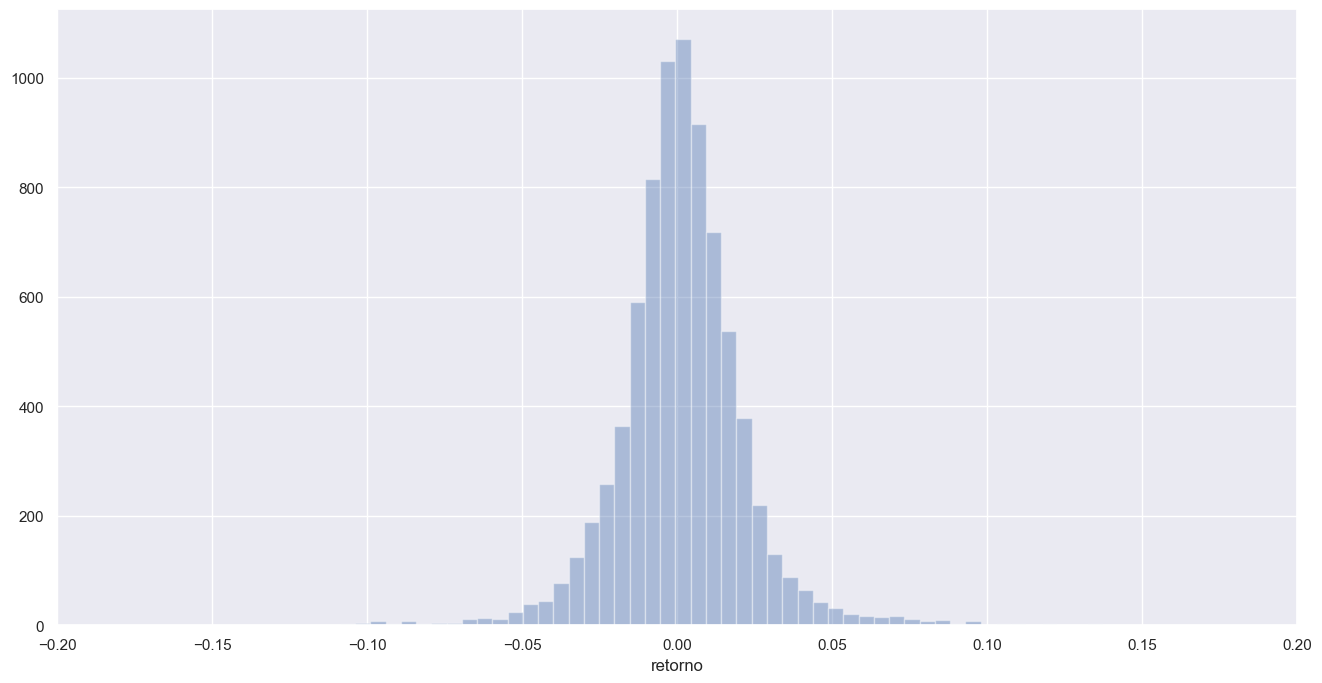

In [570]:
# Limpa a figura atual para evitar sobreposição de gráficos anteriores
plt.clf()
# Cria um histograma da série ibov['retorno'], dividindo os dados em 100 intervalos (bins=100). 
# O parâmetro kde=False desativa a curva de densidade estimada (KDE), mostrando apenas o histograma.sns.distplot(ibov['retorno'], bins=100, kde=False);
sns.distplot(ibov['retorno'], bins=100, kde=False);
plt.xlim(-0.2, 0.2)
print( 'excess kurtosis (formato da cauda) of normal distribution (should be 0): {}'.format( kurtosis(ibov['retorno']) ))
print( 'skewness(simetria, inclinação) of normal distribution (should be 0): {}'.format( skew(ibov['retorno']) ))

(-0.2, 0.2)

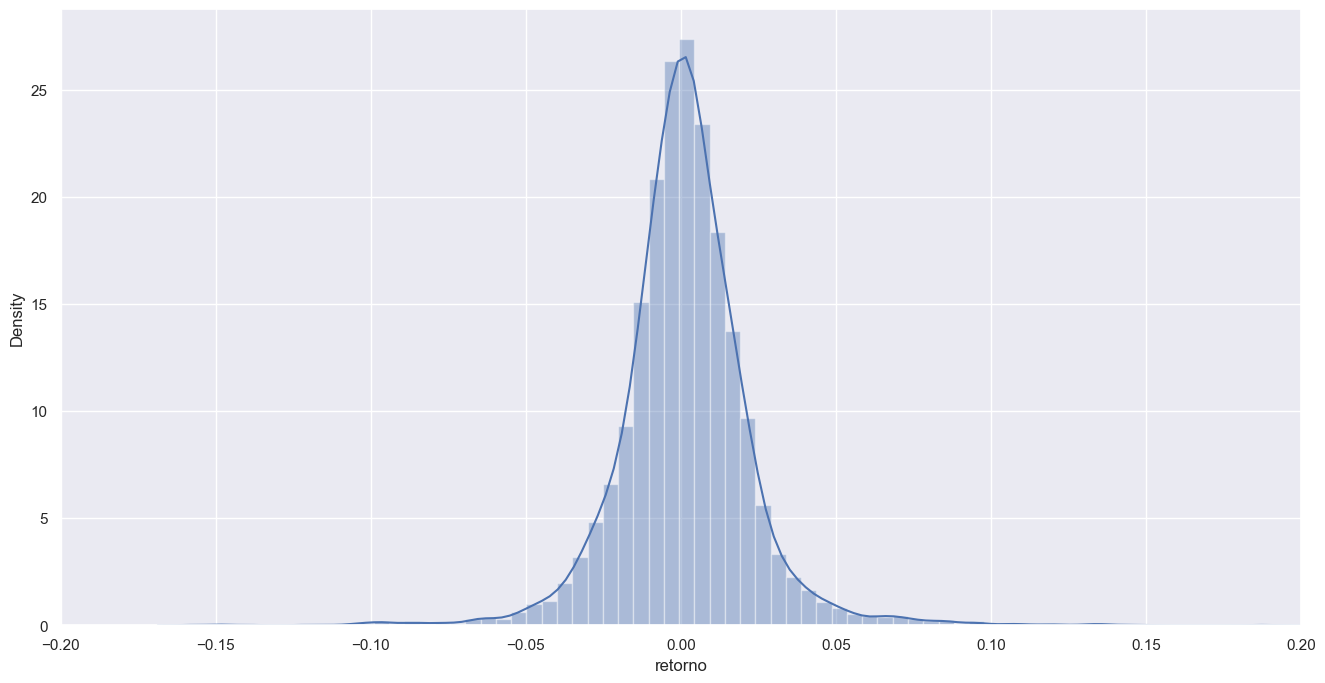

In [571]:
plt.clf()
# Cria um histograma da série ibov['retorno'], dividindo os dados em 100 intervalos (bins=100). 
# O parâmetro kde=False desativa a curva de densidade estimada (KDE), mostrando apenas o histograma.sns.distplot(ibov['retorno'], bins=100, kde=False);
sns.distplot(ibov['retorno'], bins=100, kde=True);
plt.xlim(-0.2, 0.2)

In [572]:
stock['retorno'] = stock['Close'].pct_change()
stock.dropna(inplace=True)

excess kurtosis (formato da cauda) of normal distribution (should be 0): 4.935900955030296
skewness(simetria, inclinação) of normal distribution (should be 0): 0.38145066482635975


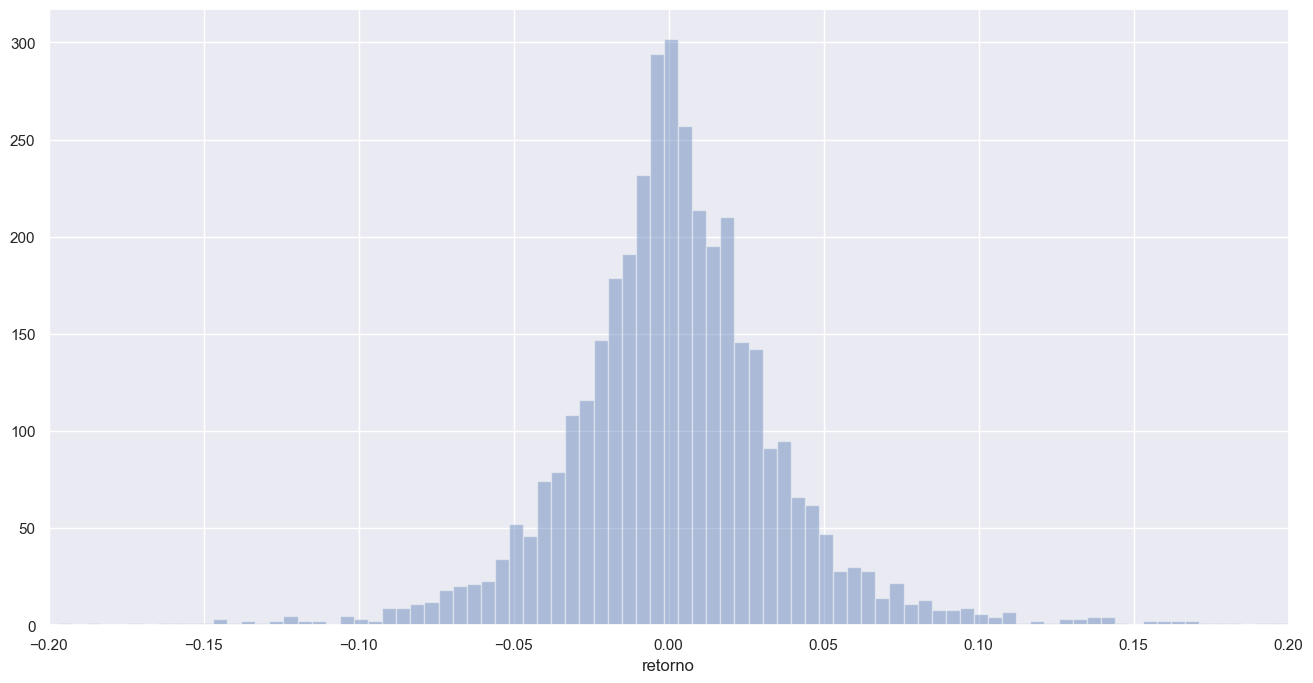

In [573]:
# Limpa a figura atual para evitar sobreposição de gráficos anteriores
plt.clf()
# Cria um histograma da série ibov['retorno'], dividindo os dados em 100 intervalos (bins=100). 
# O parâmetro kde=False desativa a curva de densidade estimada (KDE), mostrando apenas o histograma.sns.distplot(ibov['retorno'], bins=100, kde=False);
sns.distplot(stock['retorno'], bins=100, kde=False);
plt.xlim(-0.2, 0.2)
print( 'excess kurtosis (formato da cauda) of normal distribution (should be 0): {}'.format( kurtosis(stock['retorno']) ))
print( 'skewness(simetria, inclinação) of normal distribution (should be 0): {}'.format( skew(stock['retorno']) ))

(-0.2, 0.2)

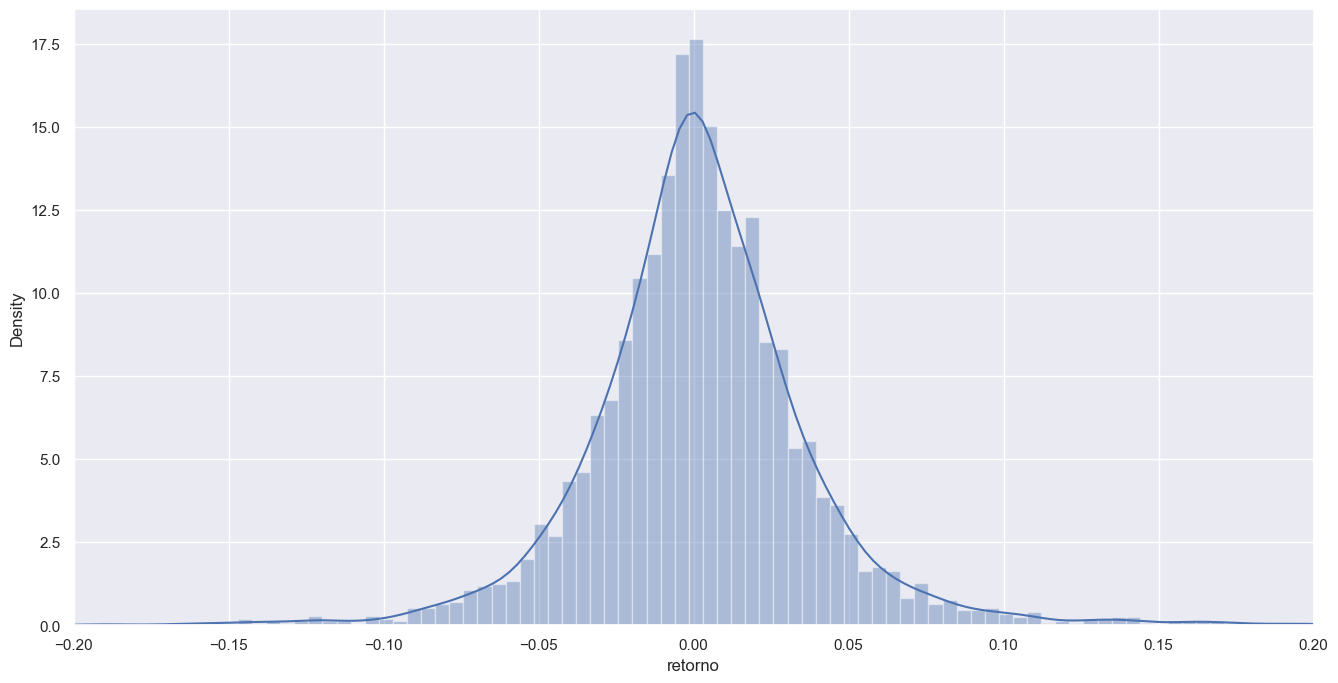

In [574]:
# Limpa a figura atual para evitar sobreposição de gráficos anteriores
plt.clf()
# Cria um histograma da série ibov['retorno'], dividindo os dados em 100 intervalos (bins=100). 
# O parâmetro kde=False desativa a curva de densidade estimada (KDE), mostrando apenas o histograma.sns.distplot(ibov['retorno'], bins=100, kde=False);
sns.distplot(stock['retorno'], bins=100, kde=True);
plt.xlim(-0.2, 0.2)

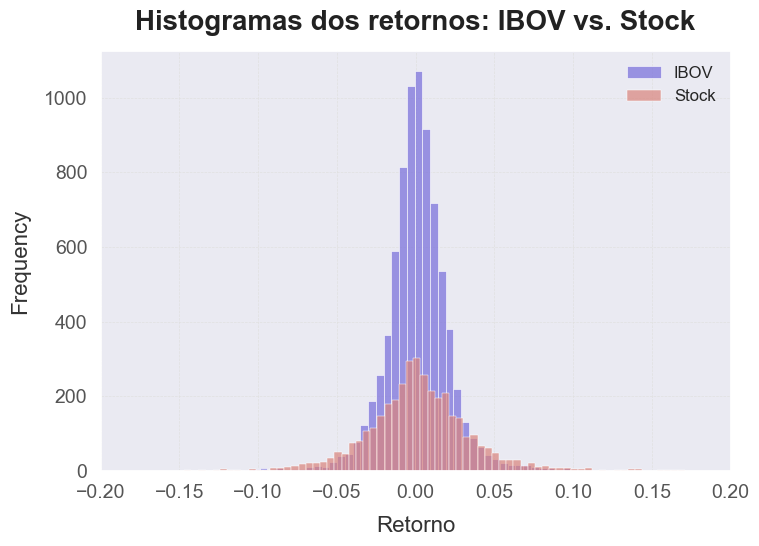

In [575]:
# Plot settings following the specified scientific theme guidelines
fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

# Plot histograms on the same axes
sns.histplot(ibov['retorno'], bins=100, kde=False, color="#766CDB", alpha=0.7, label="IBOV", ax=ax)
sns.histplot(stock['retorno'], bins=100, kde=False, color="#DA847C", alpha=0.7, label="Stock", ax=ax)

# Aesthetics
ax.set_xlim(-0.2, 0.2)
ax.set_xlabel("Retorno", labelpad=10, fontsize=16, fontweight="medium", color="#333333")
ax.set_ylabel("Frequency", labelpad=10, fontsize=16, fontweight="medium", color="#333333")
ax.set_title("Histogramas dos retornos: IBOV vs. Stock", pad=15, fontsize=20, fontweight="semibold", color="#222222")
ax.tick_params(axis='both', labelsize=14, colors="#555555")
ax.legend(fontsize=12, loc="upper right", frameon=False)

# Grid lines
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color="#E0E0E0")

plt.show()



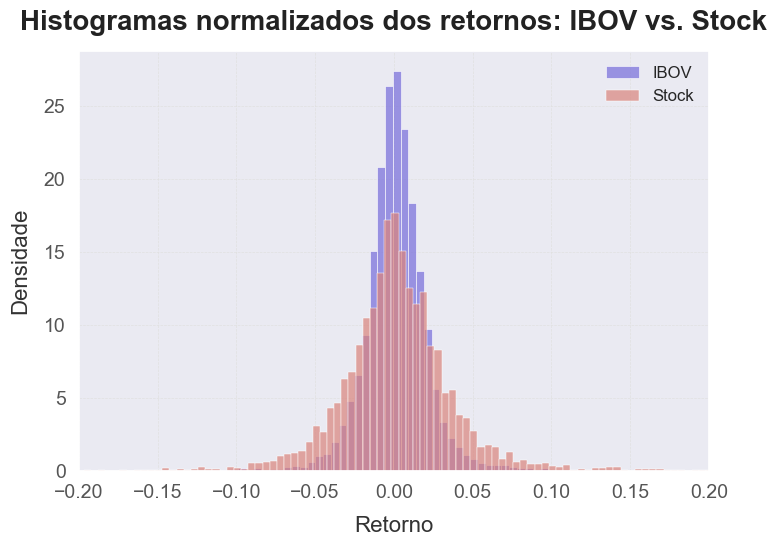

In [576]:

fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
ax.set_axisbelow(True)

# Plot density-normalized histograms
sns.histplot(ibov['retorno'], bins=100, stat='density', kde=False,
             color="#766CDB", alpha=0.7, label="IBOV", ax=ax)
sns.histplot(stock['retorno'], bins=100, stat='density', kde=False,
             color="#DA847C", alpha=0.7, label="Stock", ax=ax)

# Styling
ax.set_xlim(-0.2, 0.2)
ax.set_xlabel("Retorno", labelpad=10, fontsize=16, fontweight="medium", color="#333333")
ax.set_ylabel("Densidade", labelpad=10, fontsize=16, fontweight="medium", color="#333333")
ax.set_title("Histogramas normalizados dos retornos: IBOV vs. Stock", pad=15, fontsize=20, fontweight="semibold", color="#222222")
ax.tick_params(axis='both', labelsize=14, colors="#555555")
ax.legend(fontsize=12, frameon=False)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color="#E0E0E0")

plt.show()


In [577]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio Ibov = {:.2f}%'.format(media_ibov*100))

Retorno médio Ibov = 0.13%


In [578]:
media_stock = stock['retorno'].mean()
print('Retorno médio STOCK = {:.2f}%'.format(media_stock*100))

Retorno médio STOCK = 0.21%


In [579]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio padrão ibov = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio padrão ibov = 2.14%


In [580]:
desvio_padrao_stock = stock['retorno'].std()
print('Desvio padrão stock = {:.2f}%'.format(desvio_padrao_stock*100))

Desvio padrão stock = 3.66%


## Cisnes Negros ##
* 1997-10-27 - Crise Financeira Asiática, que afetou os mercados globais. A crise começou na Tailândia, com a desvalorização da moeda local, e se espalhou para outros países asiáticos, como Malásia, Indonésia e Coreia do Sul.s





* 1998-09-10 - A Rússia enfrentava uma grave crise econômica, com a forte desvalorização do rublo e dificuldades para pagar sua dívida externa. O governo russo decretou moratória, ou seja, anunciou que não conseguiria honrar seus compromissos financeiros. Isso gerou pânico nos mercados globais, levando investidores a retirarem capital de países emergentes, incluindo o Brasil. Como reflexo, o Ibovespa despencou 15,83%, acionando o mecanismo de circuit breaker para interromper as negociações. Esse evento foi um dos momentos mais críticos da economia brasileira nos anos 90, levando o governo a elevar os juros para 49,75% na tentativa de conter a fuga de dólares.

In [583]:
# dias em que Ibov teve retorno abaixo de 12%
ibov[ibov["retorno"] < -0.12]

Price,Close,retorno
Ticker,^BVSP,
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


# Definição da Função Normal

A **Função de Densidade de Probabilidade (PDF)** da distribuição normal é dada por:

$$
F(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Onde:
- \( x \) → Valor da variável aleatória
- \( \mu \) → Média da distribuição
- \( \sigma \) → Desvio padrão
- \( e \) → Base do logaritmo natural (~2.718)
- \( \pi \) → Constante matemática (~3.1416)

# Função de Distribuição Acumulada (CDF)

A **Função de Distribuição Acumulada (CDF)** calcula a probabilidade de uma variável aleatória assumir um valor menor ou igual a um determinado ponto. Para uma distribuição normal, o cálculo do CDF envolve a integral da **função de densidade de probabilidade (PDF)**.

## Fórmula da CDF para uma distribuição normal padrão

$$
F(x) = \frac{1}{2} \left[ 1 + \text{erf} \left(\frac{x - \mu}{\sigma \sqrt{2}}\right) \right]
$$### Definições na Distribuição Normal

- $x$ é o valor para o qual queremos calcular a probabilidade acumulada;
- $\mu$ é a média da distribuição;
- $\sigma$ é o desvio padrão;
- $\text{erf}$ é a função erro matemática, usada para calcular probabilidades em distribuições normais.is.

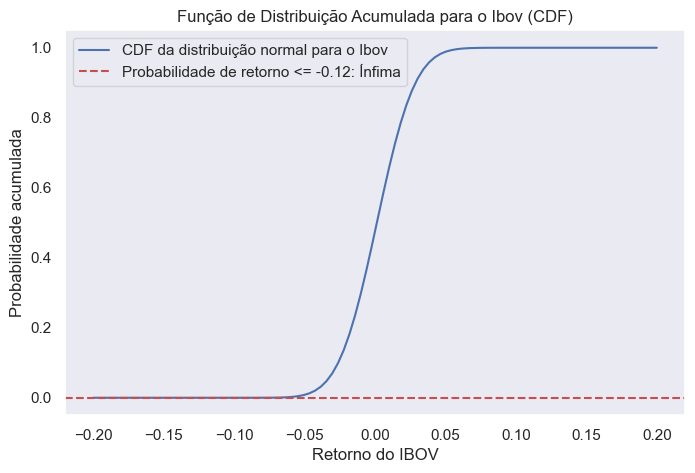

In [586]:
x = np.linspace(-0.2, 0.2, 100)  # Valores de retorno para o eixo X

# Calculando a CDF
# calcula a distribuição de probabilidade de uma variável aleatória normalmente distribuída (com média = media_ibov e desvio padrão = desvio_padrao_ibov) 
cdf_values = norm.cdf(x, loc=media_ibov, scale=desvio_padrao_ibov)

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.plot(x, cdf_values, label="CDF da distribuição normal para o Ibov")
plt.axhline(y=norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov), color='r', linestyle="--", label="Probabilidade de retorno <= -0.12: Ínfima")
plt.xlabel("Retorno do IBOV")
plt.ylabel("Probabilidade acumulada")
plt.title("Função de Distribuição Acumulada para o Ibov (CDF)")
plt.legend()
plt.grid()
plt.show()

<Axes: title={'center': 'Cumulative Return'}, xlabel='Date'>

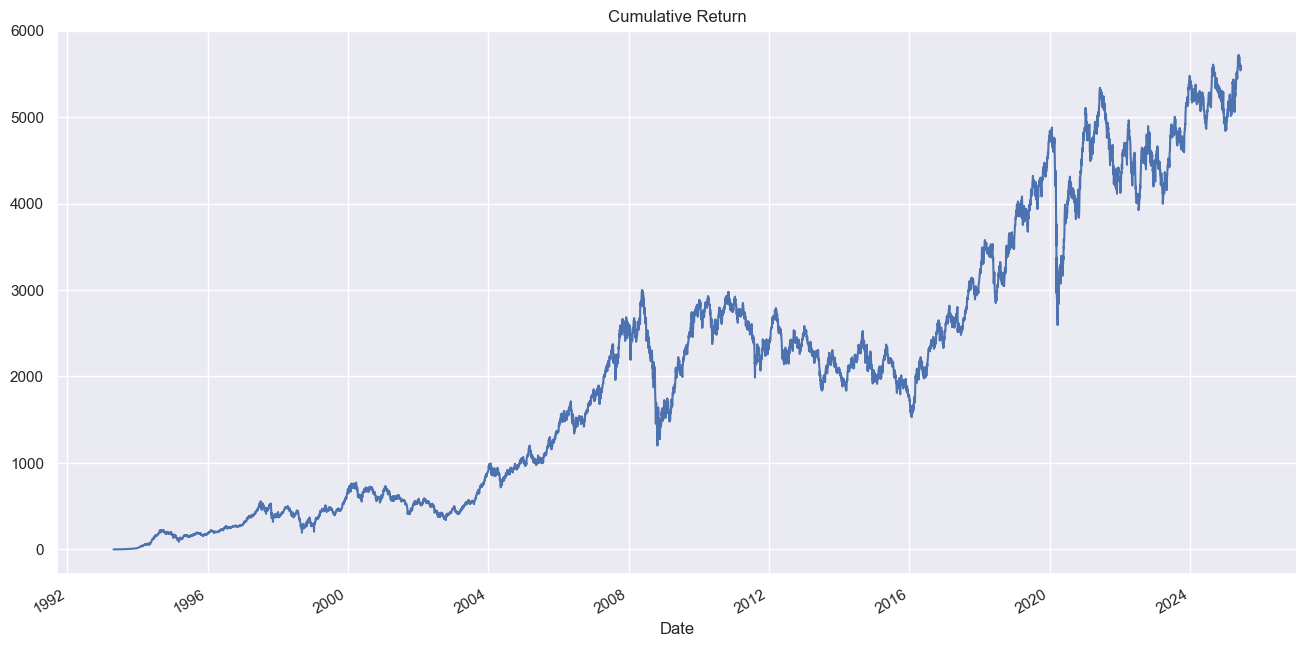

In [587]:
# https://www.delftstack.com/pt/howto/matplotlib/plot-cdf-matplotlib-python/
ibov['Cumulative Return'] = (1 + ibov['retorno']).cumprod()
ibov['Cumulative Return'].plot(label='Curva',figsize=(16,8),title='Cumulative Return')


<Axes: title={'center': 'Cotações'}, xlabel='Date'>

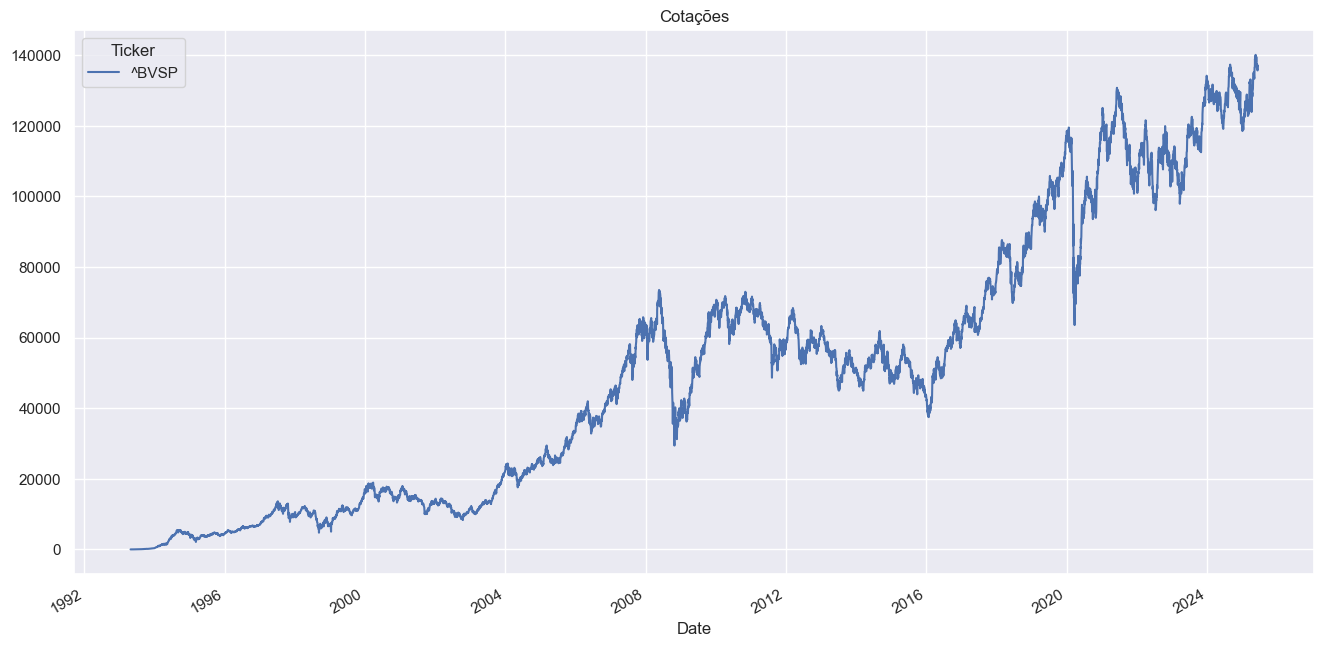

In [588]:
ibov['Close'].plot(label='Curva',figsize=(16,8),title='Cotações')

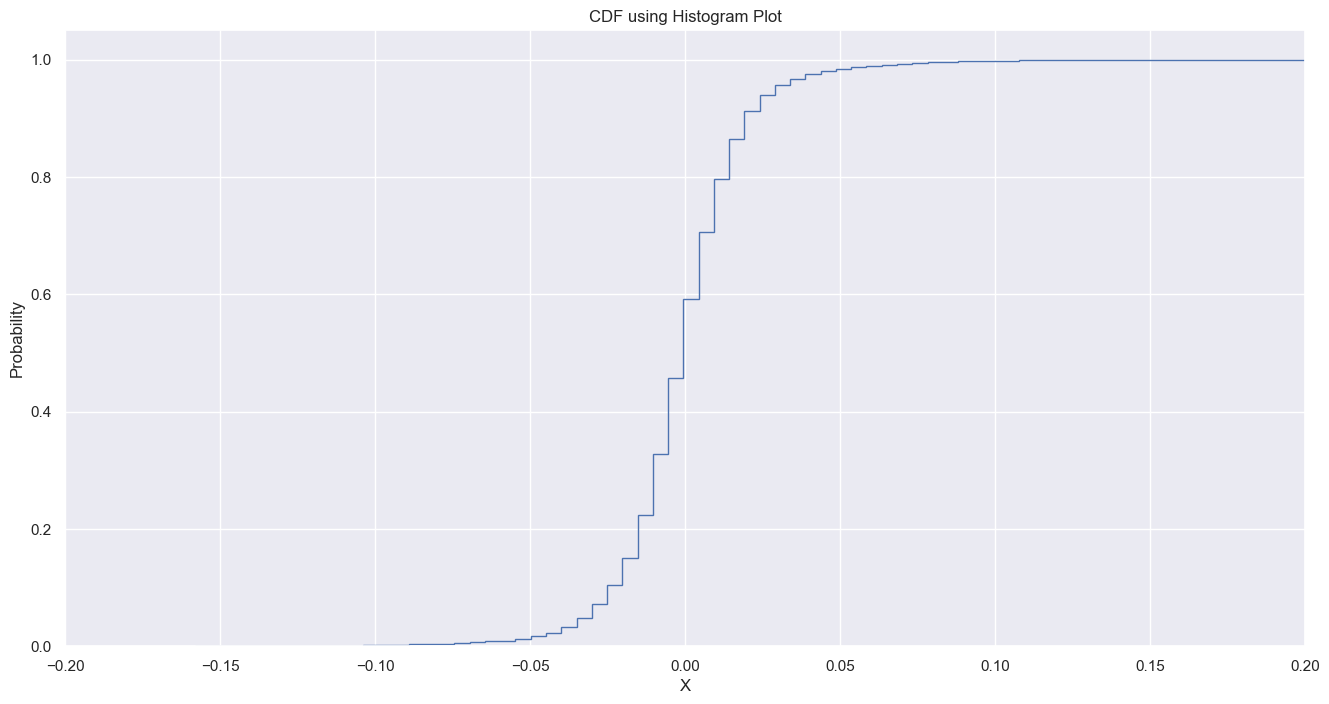

In [589]:
plt.hist(ibov['retorno'], bins=100, density=True, cumulative=True, label="CDF", histtype="step")
plt.xlabel("X")
plt.ylabel("Probability")
#plt.xticks(np.arange(0, 10))
plt.title("CDF using Histogram Plot")
plt.xlim(-0.2, 0.2)
plt.show()


**Qual a probabilidade do ibov cair mais que 12% considerando que os retornos seguem uma distribuição normal?**

In [591]:
# cumulative distribution function (CDF)
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000073%


In [592]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 136978909 dias
Ou uma vez a cada 543567 anos


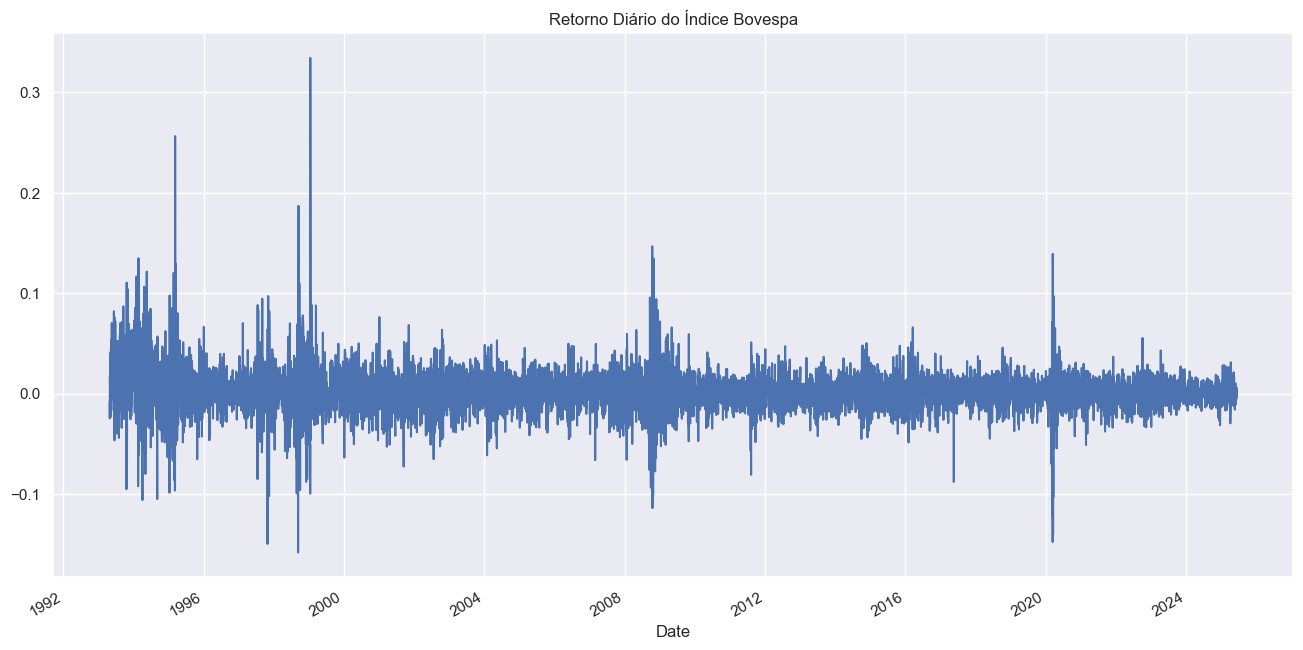

In [593]:
ibov['retorno'].plot(title="Retorno Diário do Índice Bovespa");

In [594]:
# norm.rvs gera números randomicos dentro de uma distribuicao normal de acordo com os parametros
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size,  loc=media_ibov, scale=desvio_padrao_ibov)
print( 'excess kurtosis (formato da cauda) of normal distribution (should be 0): {}'.format( kurtosis(ibov['retorno_teorico']) ))
print( 'skewness(simetria, inclinação) of normal distribution (should be 0): {}'.format( skew(ibov['retorno_teorico']) ))

excess kurtosis (formato da cauda) of normal distribution (should be 0): 0.00774017583301001
skewness(simetria, inclinação) of normal distribution (should be 0): -0.017308133677993956


(-0.2, 0.4)

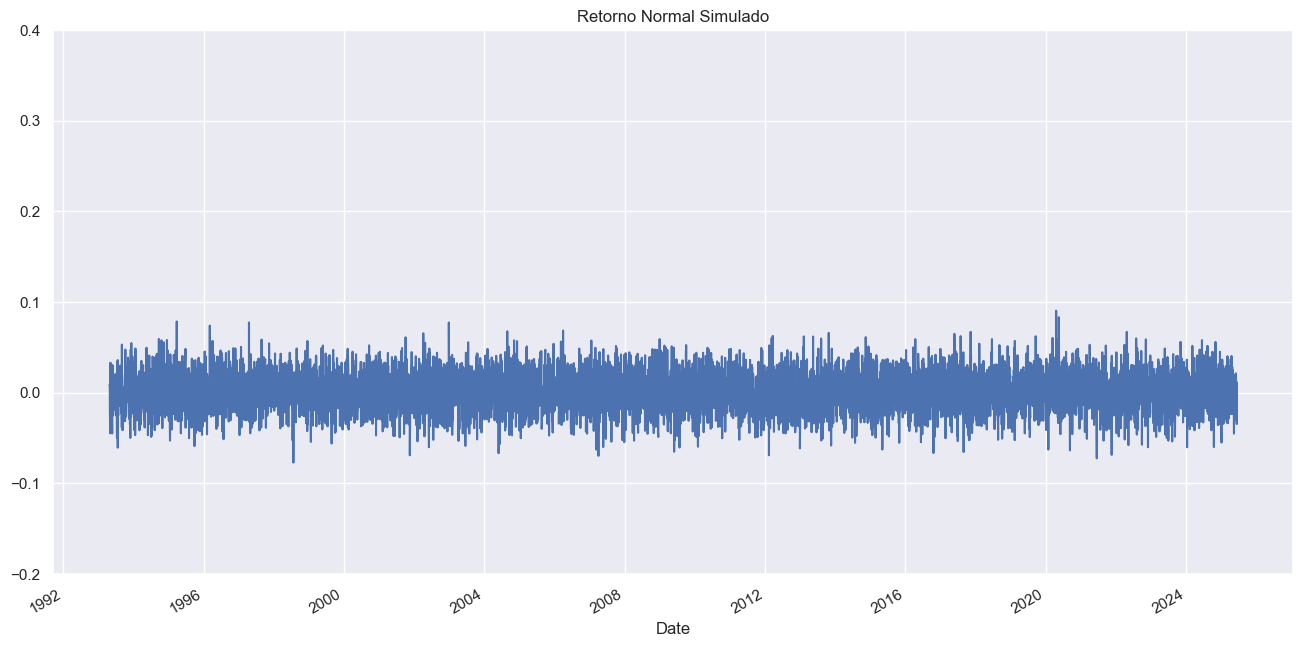

In [595]:
ax = ibov['retorno_teorico'].plot(title="Retorno Normal Simulado");
ax.set_ylim(-0.2, 0.4)

(-0.2, 0.2)

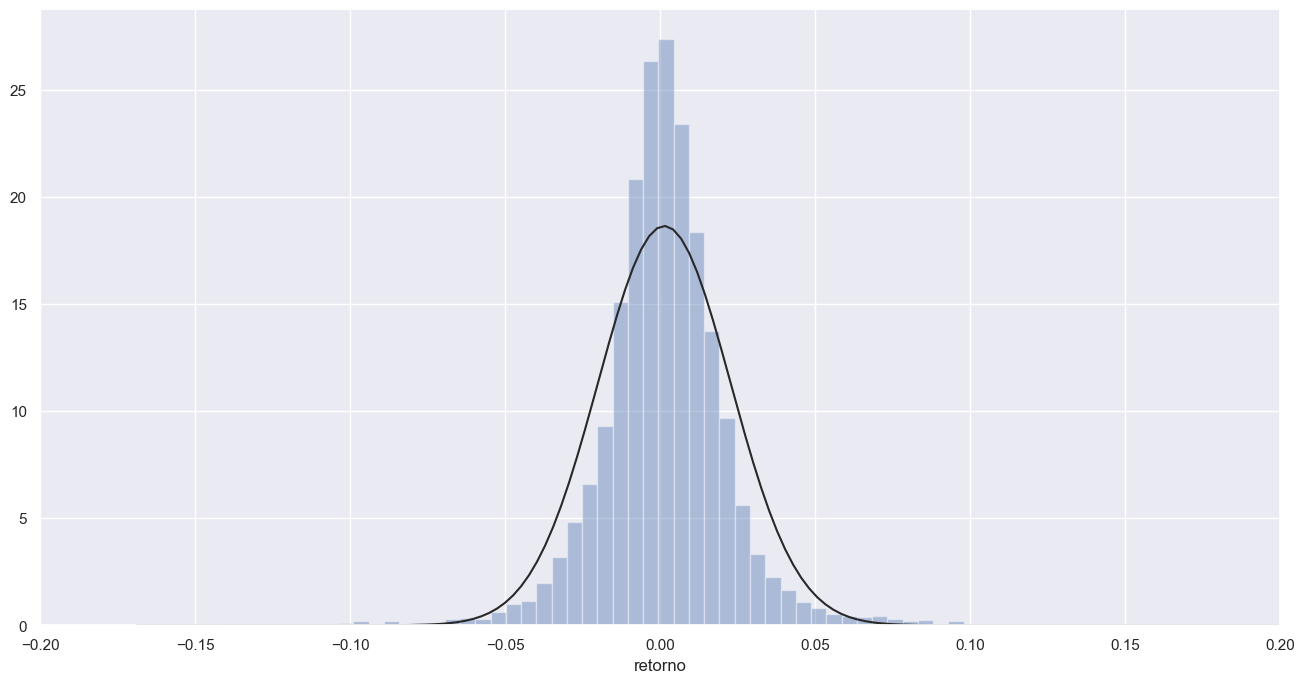

In [596]:
# ajuste com distribuição normal
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=norm);
plt.xlim(-0.2, 0.2)
# não se ajusta perfeitamente

(-0.2, 0.2)

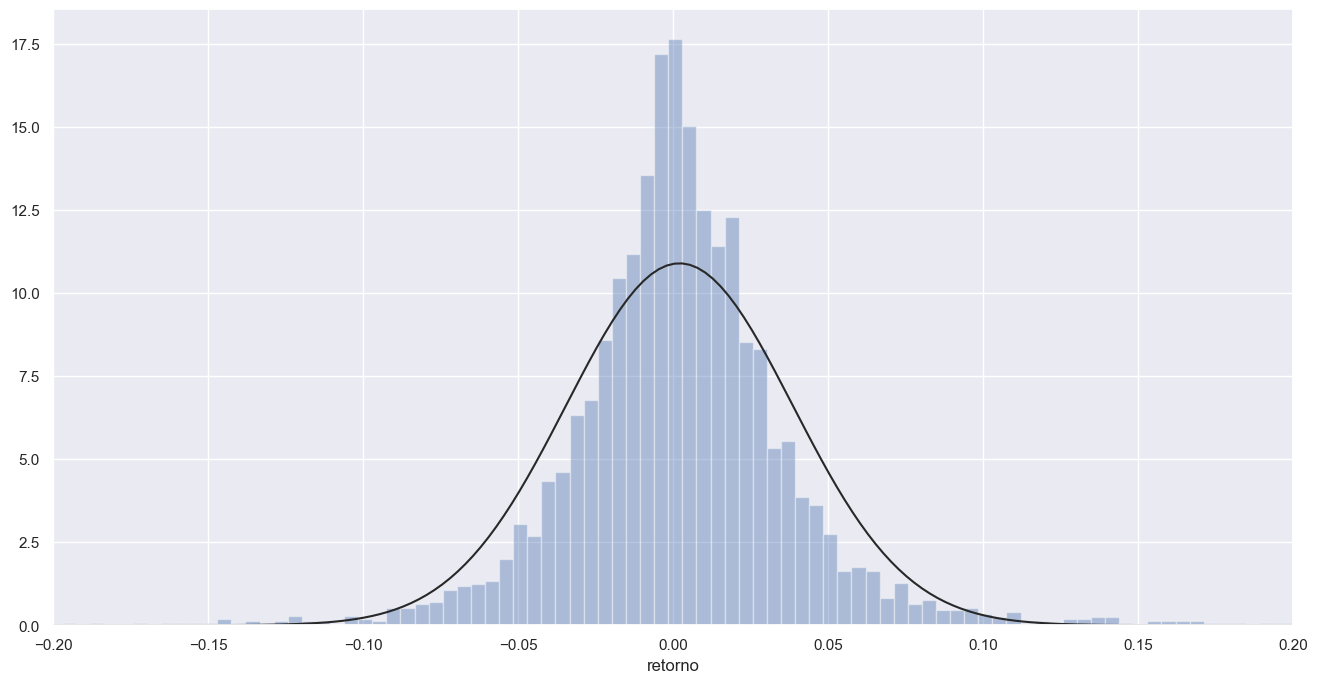

In [597]:
# ajuste com distribuição normal
sns.distplot(stock['retorno'], bins=100, kde=False, fit=norm);
plt.xlim(-0.2, 0.2)
# não se ajusta perfeitamente

(-0.2, 0.2)

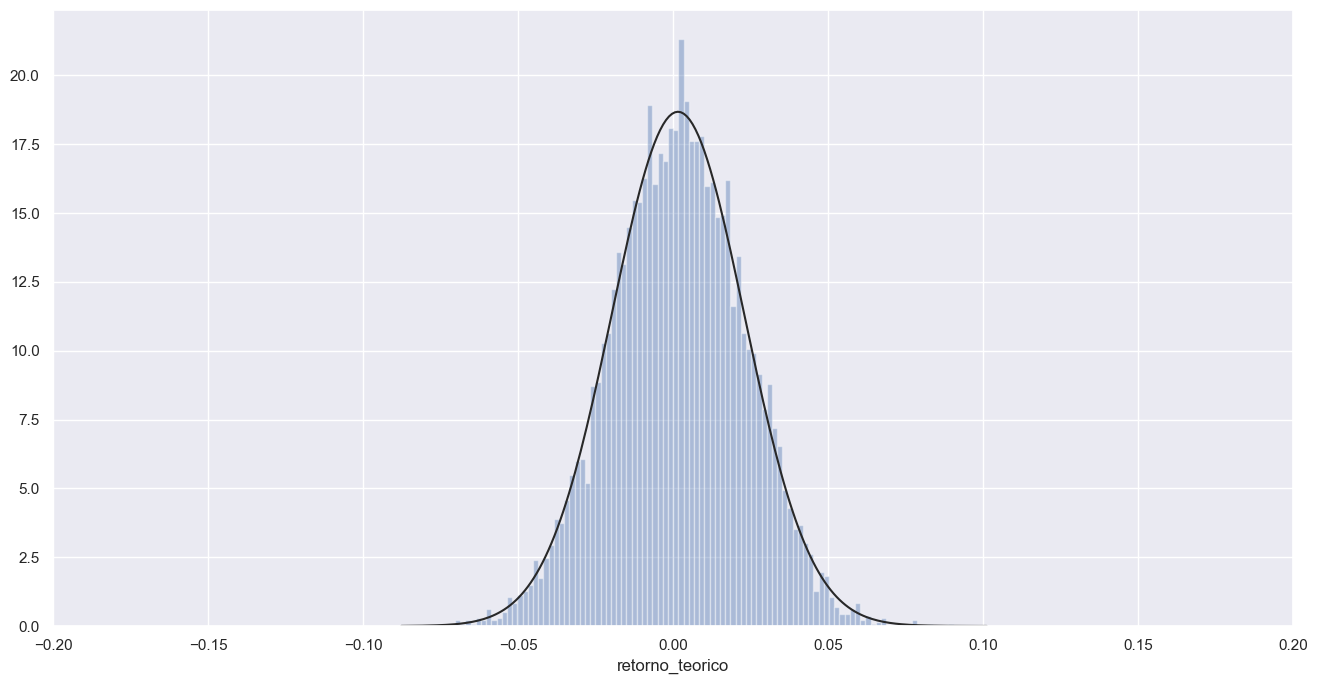

In [598]:
# ajuste com distribuição normal sobre os retornos artificiais com parâmetros do Ibovespa
sns.distplot(ibov['retorno_teorico'], bins=100, kde=False, fit=norm);
plt.xlim(-0.2, 0.2)

### Ajuste com a Distribuição t-Student

O ajuste com a **distribuição t-Student** é feito porque essa distribuição é mais apropriada para modelar retornos financeiros, especialmente quando há **caudas longas**. Isso significa que a distribuição considera **eventos extremos** (valores muito altos ou baixos) com maior probabilidade do que a distribuição normal. Mais realista.

(-0.2, 0.2)

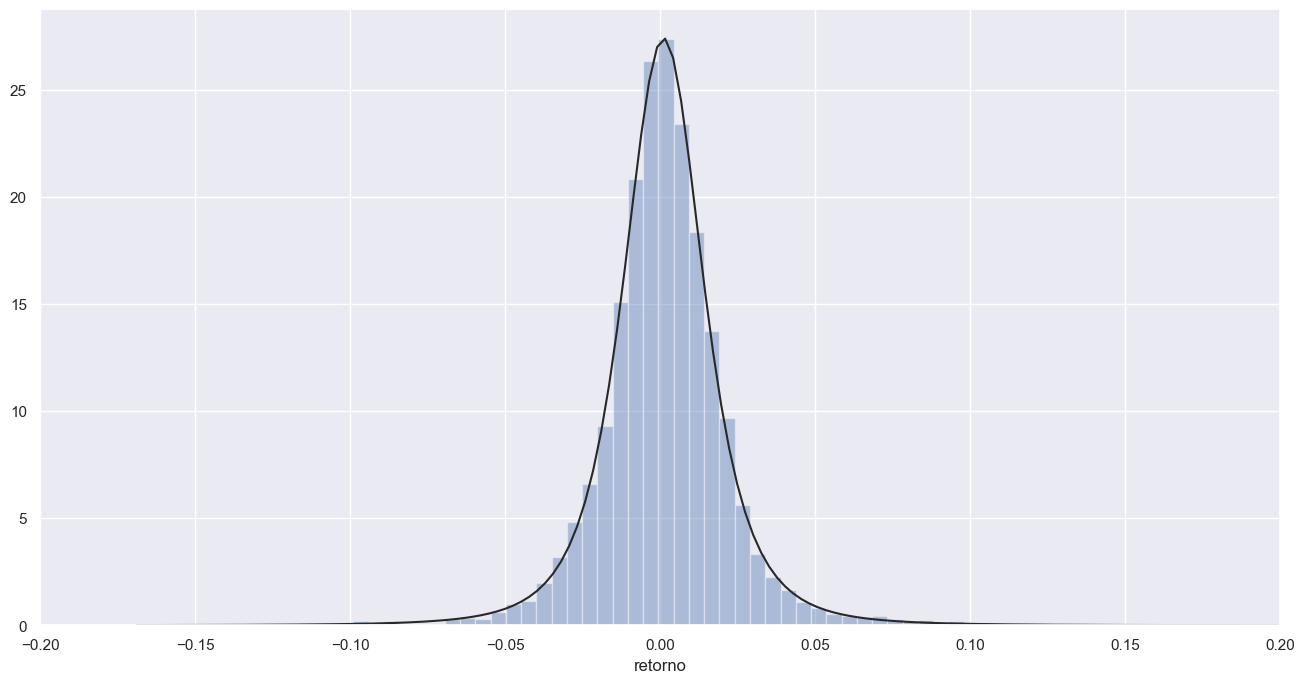

In [600]:
# ajuste com distribuição t-student. Distribuição de cauda longa.
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=t);
plt.xlim(-0.2, 0.2)

### Ajuste da Distribuição t-Student

- O método `fit()` ajusta a **distribuição t-Student** aos dados históricos dos retornos do IBOV.
- Ele retorna três parâmetros principais:
  - **Graus de liberdade (`df`)** → Indica a dispersão das caudas (quanto menor, maior a concentração).
  - **Média (`loc`)** → Representa o centro da distribuição dos retornos.
  - **Desvio padrão (`scale`)** → Mede a variabilidade dos retornos em torno da média.

In [602]:
# parâmetros da t-student utilizada
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.20 
Média=0.0011 
Desvio padrão=0.01348


In [603]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.11284385%


In [604]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 886 dias
Ou uma vez a cada 3 anos


In [605]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 136978909 dias
Ou uma vez a cada 543567 anos


In [606]:
# total de dias dividido pela quantidade de dias. Resultado é a frequencia
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_observada/252, 5))))

Na vida real aconteceu: 
Uma vez a cada 1590 dias
Ou uma vez a cada 6 anos


## Testes de Normalidade

### Teste de Shapiro-Wilk

O **teste de Shapiro-Wilk** é indicado para avaliar se um conjunto de dados segue uma **distribuição normal**. Ele é particularmente útil para **amostras pequenas** (tipicamente abaixo de 50 observações), mas pode ser aplicado a conjuntos maiores também.

### Características do teste de Shapiro-Wilk:
- **Hipótese nula** (\(H_0\)) → Os dados vêm de uma distribuição normal/Gaussiana.
- **Hipótese alternativa** (\(H_A\)) → Os dados não seguem uma distribuição normal.
- Se o **valor-p** for **menor que 0.05** → Rejeitamos \(H_0\) e concluímos que os dados **não** seguem uma distribuição normal.
- Se o **valor-p** for **maior que 0.05** → Não há evidências suficientes para rejeitar \(H_0\), então os dados **podem ser considerados normais**.

In [609]:
print('Normal Test')
x = ibov['retorno']
print('p-value Shapiro')
#print("%.6f" % shapiro_results[1])
# normality test
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(x) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(x) ))

Normal Test
p-value Shapiro
Statistics=0.901, p=0.000
Sample does not look Gaussian (reject H0)
excess kurtosis of normal distribution (should be 0): 15.802541276964831
skewness of normal distribution (should be 0): 0.8441278201714157


In [610]:
print('Normal Test')
st = stock['retorno']
print('p-value Shapiro')
#print("%.6f" % shapiro_results[1])
# normality test
stat, p = shapiro(st)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(st) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(st) ))

Normal Test
p-value Shapiro
Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)
excess kurtosis of normal distribution (should be 0): 4.935900955030296
skewness of normal distribution (should be 0): 0.38145066482635975


In [611]:
print('Normal Test')
y = ibov['retorno_teorico']
print('p-value Shapiro')
# normality test
stat, p = shapiro(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(y) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(y) ))

Normal Test
p-value Shapiro
Statistics=1.000, p=0.764
Sample looks Gaussian (fail to reject H0)
excess kurtosis of normal distribution (should be 0): 0.00774017583301001
skewness of normal distribution (should be 0): -0.017308133677993956


### Q-Q Plot - Teste visual de normalidade

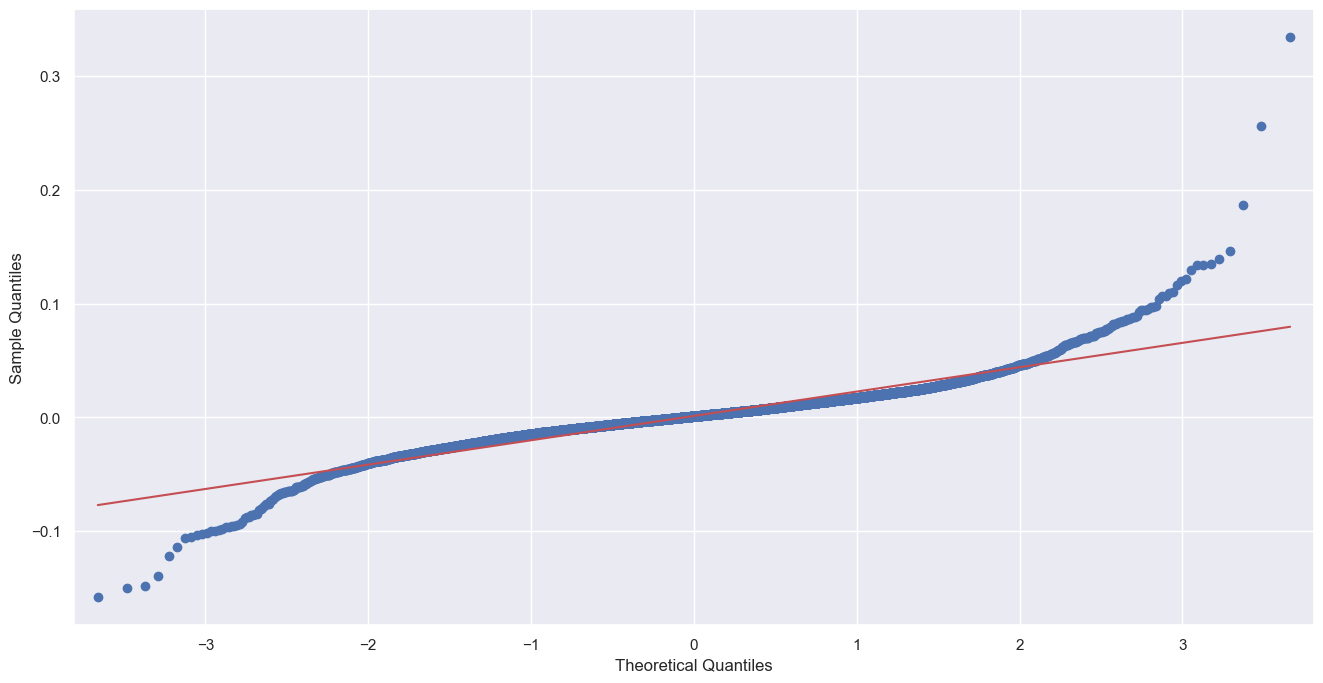

In [613]:
# q-q plot
qqplot(ibov['retorno'], line='s')
plt.show()

In [614]:
import scipy.stats as stats

# Ordenando os retornos
dados_ordenados = np.sort(ibov['retorno'])

# Obtendo quantis teóricos da distribuição normal
quantis_teoricos = stats.norm.ppf((np.arange(1, len(dados_ordenados) + 1) - 0.5) / len(dados_ordenados))

# Calculando a correlação de Pearson entre os quantis observados e os teóricos
correlacao, _ = stats.pearsonr(dados_ordenados, quantis_teoricos)

print(f"Correlação dos quantis para o Ibov: {correlacao:.4f}")

Correlação dos quantis para o Ibov: 0.9489


In [615]:
# Ordenando os retornos
dados_ordenados = np.sort(stock['retorno'])

# Obtendo quantis teóricos da distribuição normal
quantis_teoricos = stats.norm.ppf((np.arange(1, len(dados_ordenados) + 1) - 0.5) / len(dados_ordenados))

# Calculando a correlação de Pearson entre os quantis observados e os teóricos
correlacao, _ = stats.pearsonr(dados_ordenados, quantis_teoricos)

print(f"Correlação dos quantis para a ação: {correlacao:.4f}")

Correlação dos quantis para a ação: 0.9686


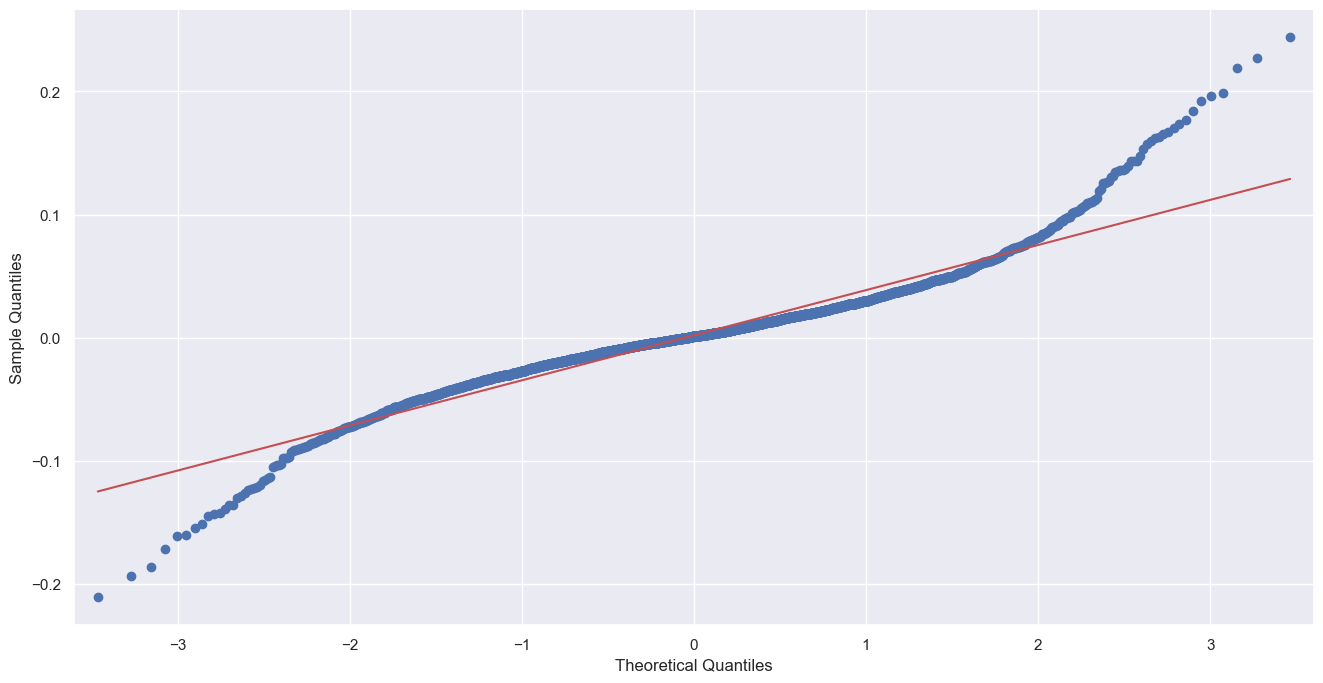

In [616]:
# q-q plot
qqplot(stock['retorno'], line='s')
plt.show()

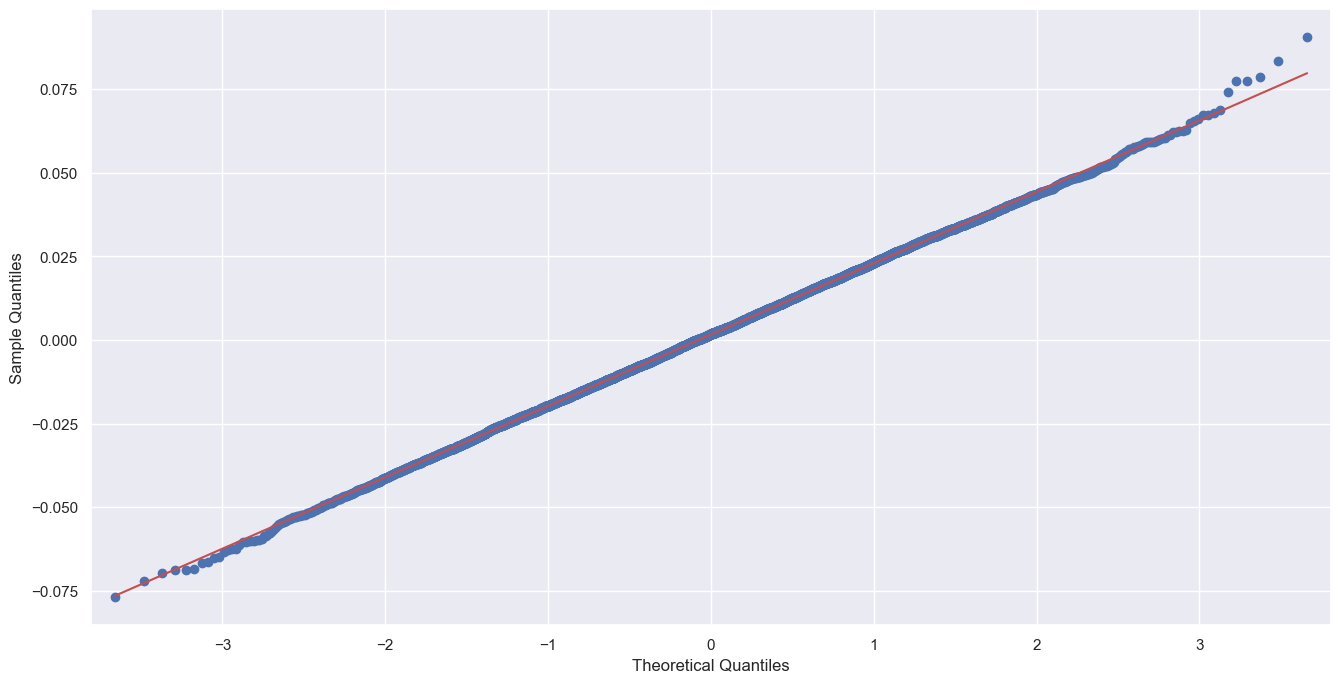

In [617]:
# q-q plot
qqplot(ibov['retorno_teorico'], line='s')
plt.show()

### TESTES NÃO PARAMÉTRICOS

### Teste de Mann-Whitney U

O **teste de Mann-Whitney U** é um **teste estatístico não paramétrico** usado para comparar duas amostras independentes e determinar se uma delas tende a ter valores maiores que a outra. Ele é uma alternativa ao teste t de Student quando os dados **não seguem uma distribuição normal**.

### Quando usar o teste de Mann-Whitney U?
- Quando se deseja comparar **duas amostras independentes**.
- Quando os dados **não são normalmente distribuídos**.
- Quando a variável de interesse é **ordinal** ou **contínua**.
- Quando a amostra tem um **tamanho pequeno** e o teste t não é adequado.

### Como funciona?
1. **Ordenação dos dados** → Os valores das duas amostras são combinados e organizados em ordem crescente.
2. **Cálculo dos postos (ranks)** → Cada valor recebe uma posição (ranking) baseada em sua magnitude.
3. **Soma dos postos** → A soma dos ranks é calculada para cada grupo.
4. **Cálculo da estatística U** → Baseado nos ranks, a estatística U é calculada para avaliar se há uma diferença significativa entre os grupos.
5. **Interpretação do valor-p** → Se o **valor-p** for menor que um nível de significância (ex.: 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa entre os grupos.

### Interpretação dos resultados:
- **Hipótese nula** (\(H_0\)) → As distribuições das duas amostras são iguais.
- **Hipótese alternativa** (\(H_A\)) → As distribuições são diferentes.
- Se **\( p < 0.05 \)** → Há **evidência estatística** de que os grupos possuem distribuições distintas.
- Se **\( p >= 0.05 \)** → **Não há evidências suficientes** para afirmar que há uma diferença entre as amostras.

In [620]:
# Mann-Whitney U test
# The Mann-Whitney U test is a nonparametric statistical significance test for determining 
# whether two independent samples were drawn from a population with the same distribution.

# compare samples
stat, p = mannwhitneyu(ibov['retorno'], stock['retorno'])
print('Statistics= %.3f, p= %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics= 14866108.000, p= 0.577
Same distribution (fail to reject H0)


In [621]:
# Kruskal-Wallis H-test
# This test can be used to determine whether more than two independent samples have a 
# different distribution. It can be thought of as the generalization of the Mann-Whitney U test

# compare samples
stat, p = kruskal(ibov['retorno'], stock['retorno'])
print('Statistics= %.3f, p= %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics= 0.311, p= 0.577
Same distribution (fail to reject H0)


### Teste de Friedman

O **teste de Friedman** é um **teste estatístico não paramétrico** usado para comparar **três ou mais grupos dependentes** e determinar se há diferenças significativas entre eles. Ele é uma alternativa ao **ANOVA de medidas repetidas** quando os dados não seguem uma distribuição normal.

### Quando usar o teste de Friedman?
- Quando há **três ou mais grupos dependentes** (ex.: medidas repetidas sobre os mesmos indivíduos).
- Quando os dados **não são normalmente distribuídos**.
- Quando se deseja verificar se um fator afeta os resultados ao longo do tempo ou em diferentes condições.

### Como funciona?
1. **Organização dos dados** → Os valores são agrupados por sujeito ou unidade experimental.
2. **Cálculo dos postos (ranks)** → Em cada grupo, os valores recebem ranks para eliminar a influência de escalas de medida.
3. **Cálculo da estatística de Friedman** → A soma dos ranks é utilizada para determinar se há diferença significativa.
4. **Interpretação do valor-p** → Se o **valor-p** for menor que 0.05, rejeitamos a hipótese nula e concluímos que há diferença estatística.

### Interpretação dos resultados:
- **Hipótese nula** (\(H_0\)) → Todos os grupos têm distribuições iguais.
- **Hipótese alternativa** (\(H_A\)) → Pelo menos um grupo tem uma distribuição diferente.
- Se **\( p < 0.05 \)** → Há **diferença estatística significativa** entre os grupos.
- Se **\( p \geq 0.05 \)** → **Não há evidências suficientes** para afirmar que os grupos são diferentes.

In [623]:
# Friedman test
# As in the previous example, we may have more than two different 
# samples and an interest in whether all samples have the same distribution or not.
# seed the random number generator
seed(1)
# We will use the randn() NumPy function to generate a sample of 100 Gaussian random numbers 
#in each sample with a mean of 0 and a standard deviation of 1. Observations in the first sample are
#scaled to have a mean of 50 and a standard deviation of 5. Observations in the second sample are scaled to
#have a mean of 51 and a standard deviation of 5.
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=9.360, p=0.009
Different distributions (reject H0)


### Diferenças entre o Teste de Kruskal-Wallis e o Teste de Friedman

O **teste de Kruskal-Wallis** e o **teste de Friedman** são testes não paramétricos que avaliam diferenças entre grupos, mas eles são aplicados em cenários diferentes.

### **Teste de Kruskal-Wallis (H-test)**
- **Compara três ou mais grupos independentes**.
- Alternativa não paramétrica ao **ANOVA de um fator**.
- Usa postos (ranks) para avaliar diferenças entre os grupos sem assumir normalidade.
- Exemplo: comparar os retornos de **ações diferentes** para verificar se têm distribuições estatísticas distintas.

### **Teste de Friedman**
- **Compara três ou mais grupos dependentes** (medidas repetidas no mesmo grupo de indivíduos).
- Alternativa não paramétrica ao **ANOVA de medidas repetidas**.
- Usa postos (ranks) para avaliar se há variação ao longo do tempo ou entre diferentes condições.
- Exemplo: testar se os retornos da **mesma ação** mudam de forma estatisticamente significativa em diferentes períodos.

### **Resumo das diferenças:**
- **Kruskal-Wallis** → Dados **independentes**, compara grupos **diferentes**.
- **Friedman** → Dados **dependentes**, compara **as mesmas unidades** ao longo do tempo ou em diferentes condições.